        0         1         2         3         4         5         6    \
0  0.046575  0.654795  1.035616  1.254795  1.345205  1.731507  2.134247   

        7         8         9      ...            669        670        671  \
0  2.139726  2.161644  2.210959    ...      14.194521  14.219178  14.232877   

         672        673        674        675        676        677        678  
0  14.254795  14.254795  14.254795  14.254795  14.254795  14.254795  14.257534  

[1 rows x 679 columns]         0         1         2         3         4         5         6    \
0  0.046575  0.654795  1.035616  1.254795  1.345205  1.731507  2.134247   

        7         8         9      ...            669        670        671  \
0  2.139726  2.161644  2.210959    ...      14.194521  14.219178  14.232877   

         672        673        674        675        676        677        678  
0  14.254795  14.254795  14.254795  14.254795  14.254795  14.254795  14.257534  

[1 rows x 679 columns]
        

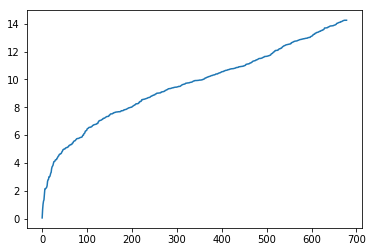

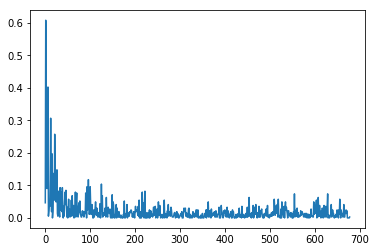

454 225
450
221
Epoch 1/100
6s - loss: 0.0049
Epoch 2/100
4s - loss: 0.0047
Epoch 3/100
4s - loss: 0.0045
Epoch 4/100
4s - loss: 0.0043
Epoch 5/100
4s - loss: 0.0040
Epoch 6/100
4s - loss: 0.0039
Epoch 7/100
4s - loss: 0.0038
Epoch 8/100
4s - loss: 0.0036
Epoch 9/100
4s - loss: 0.0035
Epoch 10/100
4s - loss: 0.0035
Epoch 11/100
4s - loss: 0.0034
Epoch 12/100
4s - loss: 0.0033
Epoch 13/100
4s - loss: 0.0033
Epoch 14/100
4s - loss: 0.0032
Epoch 15/100
4s - loss: 0.0032
Epoch 16/100
4s - loss: 0.0032
Epoch 17/100
4s - loss: 0.0031
Epoch 18/100
4s - loss: 0.0031
Epoch 19/100
4s - loss: 0.0031
Epoch 20/100
4s - loss: 0.0031
Epoch 21/100
4s - loss: 0.0031
Epoch 22/100
5s - loss: 0.0031
Epoch 23/100
4s - loss: 0.0031
Epoch 24/100
4s - loss: 0.0031
Epoch 25/100
4s - loss: 0.0031
Epoch 26/100
4s - loss: 0.0031
Epoch 27/100
4s - loss: 0.0030
Epoch 28/100
5s - loss: 0.0030
Epoch 29/100
5s - loss: 0.0030
Epoch 30/100
4s - loss: 0.0030
Epoch 31/100
4s - loss: 0.0030
Epoch 32/100
4s - loss: 0.0030
E

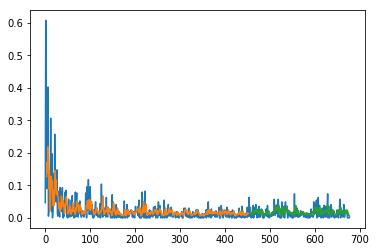

In [3]:
#load data
import pandas
import numpy
dataset_absolute = pandas.read_csv('top400seq.txt', delim_whitespace=True, nrows=1, index_col=None, header=None)
dataset = pandas.read_csv('top400seq.txt', delim_whitespace=True, nrows=1, index_col=None, header=None)
print(dataset_absolute,dataset)

for i in range(len(dataset_absolute.columns)):
    dataset[i] = dataset_absolute[i]-dataset_absolute[i-1] if(i!=0) else dataset_absolute[i]
print(dataset_absolute,dataset)

#change data form from[1,679] to[679,1]
dataset =numpy.array(dataset)
dataset=numpy.reshape(dataset,(679,1),)
print(dataset.shape)
dataset_absolute =numpy.array(dataset_absolute)
dataset_absolute=numpy.reshape(dataset_absolute,(679,1),)
print(dataset_absolute.shape)

#draw data
import matplotlib.pyplot as plt
plt.plot(dataset_absolute)
plt.show()
plt.plot(dataset)
plt.show()

# fix random seed for reproducibility
numpy.random.seed(7)
# normalize the dataset making to between[0,1]
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)
# print(dataset)
# split into train and test sets of 67% and 33%
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
print(len(train), len(test))
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(dataset[i + look_back, 0])
	return numpy.array(dataX), numpy.array(dataY)
look_back = 3
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)
print(len(trainX))
print(len(testX))
# reshape input to be [samples, time steps, features]
trainX = numpy.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = numpy.reshape(testX, (testX.shape[0], 1, testX.shape[1]))
# create and fit the LSTM network
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
model = Sequential()
model.add(LSTM(4, input_dim=look_back))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, nb_epoch=100, batch_size=1, verbose=2)
import math
# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
# invert predictions
from sklearn.metrics import mean_squared_error
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))
# shift train predictions for plotting
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [5]:
print(dataset.shape)

(144, 1)
